In [25]:
import pandas as pd
import numpy as np 
import math 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("C:\\Users\\prath\\OneDrive\\Desktop\\DSBDA CODES\\5\\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [28]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [29]:
df.shape

(400, 5)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [31]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [33]:
X = df[["Age","EstimatedSalary"]]
Y = df["Purchased"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (300, 2), Y: (300,)
Test Dataset Size - X: (100, 2), Y: (100,)


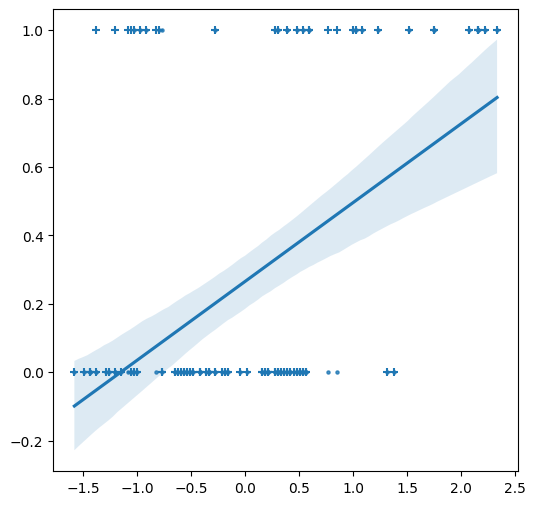

In [34]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
prediction = lr.predict(X_test)


figure = plt.figure(figsize=(6,6))
sns.regplot(x=X_test[:,1], y=prediction, scatter_kws = {'s':5})
plt.scatter(X_test[:, 1], Y_test, marker = '+')

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(Y_test, prediction)
print(cm)

[[65  3]
 [ 8 24]]


In [42]:
cr = classification_report(Y_test, prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

